In [1]:
# importing the libraris
import numpy as np
import glob
import matplotlib.pyplot as plt
import joblib
import time
import cv2
import sys

# importing the functions
from window import *
from features_functions import *
from SVM import *

# Training

In [2]:
cars = []
notcars = []

cars_path = glob.glob('vehicles/*/*/*.jpeg')
notcars_path = glob.glob('non-vehicles/*/*/*.jpeg')

for image in notcars_path:
    notcars.append(image)
for image in cars_path:
    cars.append(image)

In [3]:
# parameters
orient = 9  # HOG orientations
pix_per_cell = 8  # HOG pixels per cell
cell_per_block = 2  # HOG cells per block
hist_bins = 16    # Number of histogram bins

In [4]:
car_features = extract_features(cars, hist_bins=hist_bins, orient=orient, pix_per_cell=pix_per_cell, cell_per_block=cell_per_block)

notcar_features = extract_features(notcars, hist_bins=hist_bins, orient=orient, pix_per_cell=pix_per_cell, cell_per_block=cell_per_block)
print("--feature extraction done--")

svc, X_scaler = SVM(car_features, notcar_features)
print("--training done--")

# joblib.dump(svc, svm_pkl)
# joblib.dump(X_scaler, scaler_pkl)

KeyboardInterrupt: 

# loading model

In [5]:
svm_pkl = "svc.pkl"
scaler_pkl = "xscaled.pkl"

svc = joblib.load(svm_pkl)
X_scaler = joblib.load(scaler_pkl)

In [6]:
# We will make different window sizes for different sizes of cars
sizes_and_ystarts = [[40, [400, 80]],
                     [80, [400, 520]],
                     [120, [400, 400 + 180]],
                     [160, [400, 400 + 160 + 80]],
                     [200, [400, None]],
                     [240, [400, None]],
                     [300, [300, None]],
                     [340, [300, None]]]

In [22]:
image = plt.imread("Project_data/test_images/test5.jpg")

In [23]:
hot_windows = []
for size_and_ystart in sizes_and_ystarts:

    windows = slide_window(image, x_start_stop=[None, None], y_start_stop=[size_and_ystart[1][0], size_and_ystart[1][1]],
                        xy_window=(size_and_ystart[0], size_and_ystart[0]), xy_overlap=(0.5, 0.5))

    result = search_windows(image, windows, svc, X_scaler, hist_bins=hist_bins,
                            orient=orient, pix_per_cell=pix_per_cell,
                            cell_per_block=cell_per_block)

    for res in result:
        hot_windows.append(res)

labels = heatmap_thresh(image, hot_windows, 0)
final_img = draw_labeled_bboxes(image, labels)

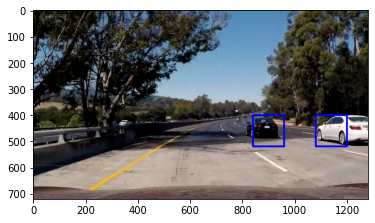

In [24]:
plt.imshow(final_img)